In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import csv
from apyori import apriori
import seaborn as sns

In [3]:
data = pd.read_csv(r'economic_freedom_index2019_data.csv', encoding='ISO-8859-1')
print(data.head())

   CountryID Country Name      WEBNAME                        Region  \
0          1  Afghanistan  Afghanistan                  Asia-Pacific   
1          2      Albania      Albania                        Europe   
2          3      Algeria      Algeria  Middle East and North Africa   
3          4       Angola       Angola            Sub-Saharan Africa   
4          5    Argentina    Argentina                      Americas   

   World Rank  Region Rank  2019 Score  Property Rights  \
0       152.0         39.0        51.5             19.6   
1        52.0         27.0        66.5             54.8   
2       171.0         14.0        46.2             31.6   
3       156.0         33.0        50.6             35.9   
4       148.0         26.0        52.2             47.8   

   Judical Effectiveness  Government Integrity  ...      Country  \
0                   29.6                  25.2  ...  Afghanistan   
1                   30.6                  40.4  ...      Albania   
2       

# Eksploracja danych- projekt

## Techniki redukcji wymiarów oraz klasteryzacja i klasyfikacja

Redukcja wymiarów za pomocą Analizy Składowych Głównych (PCA, od ang. Principal Component Analysis) to technika statystyczna stosowana w przetwarzaniu sygnałów i analizie danych, która przekształca oryginalne dane składające się z wielu zmiennych w nowy zestaw niepowiązanych ze sobą zmiennych, nazywanych głównymi składowymi. Proces ten zmniejsza liczbę zmiennych, zachowując przy tym jak najwięcej informacji zawartych w oryginalnym zestawie danych. PCA działa dobrze, gdy dane są rozłożone wokół kilku głównych składowych i są linearnie od siebie odseparowane. Celem PCA jest znalezienie kierunków w przestrzeni danych, w których rozkład danych ma największą wariancję.

*W prostych słowach, PCA pomaga nam znaleźć najważniejsze rzeczy w danych, które tłumaczą ich różnice.
Wyobraź sobie, że masz zestaw danych zawierających informacje o różnych owocach, takie jak ich rozmiar, kształt i kolor. PCA pomaga nam znaleźć te cechy, które najlepiej różnicują te owoce. Na przykład, jeśli rozmiar i kształt mają większy wpływ na to, czy owoc jest jabłkiem czy bananem niż kolor, to PCA pomoże nam to ustalić.
W praktyce, PCA sprowadza dane do prostszej postaci, eliminując mniej ważne informacje i pozostawiając tylko te, które są najbardziej istotne. Dzięki temu możemy lepiej zrozumieć, co się dzieje w danych i łatwiej nimi zarządzać. Jest to przydatne w wielu dziedzinach, od analizy danych po rozpoznawanie obrazów i wiele innych.*

Pierwszym krokiem jest standaryzacja danych, co oznacza przeskalowanie każdej zmiennej tak, aby miała średnią wartość równą 0 i odchylenie standardowe równe 1. Standaryzacja jest ważna, ponieważ PCA jest wrażliwa na różnice w skali między zmiennymi.

Inicjalizacja standardowego skalera, który normalizuje dane tak, aby miały średnią równą 0 i odchylenie standardowe równe 1.

In [4]:
# Wybór zmiennych numerycznych
numerical_data = data.select_dtypes(include=[np.number])

Standardyzacja danych numerycznych, zastępując brakujące wartości (NaN) zerami.

In [5]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data.fillna(0))

Macierz kowariancji nie jest bezpośrednio obliczana w kodzie, ale standaryzowane dane są przekazywane do obiektu PCA w celu obliczenia składowych głównych.

Algorytm PCA jest inicjalizowany za pomocą `PCA()`, a następnie wywoływana jest metoda `fit_transform()`, która oblicza składowe główne, wartości własne i wektory własne.

In [6]:
pca = PCA()
principal_components = pca.fit_transform(standardized_data)
print(principal_components)

[[ 3.16115012 -2.25893201  0.40100953 ... -0.03542994  0.0272578
   0.06748617]
 [-1.31934207 -0.61550151 -0.09440718 ... -0.13746587  0.34004764
   0.04376334]
 [ 2.21526592  0.2051415  -0.95948938 ...  0.10312178 -0.12763242
  -0.02259357]
 ...
 [ 4.44994603  3.85429348  3.43421827 ... -0.82257868 -0.29457031
  -0.36969045]
 [ 1.28046198 -0.69420452 -0.68743382 ... -0.33761466 -0.02102257
   0.01512662]
 [ 3.9177836  -0.36605602 -1.8885463  ...  0.00872715  0.17393667
   0.09559233]]


In [7]:
print(principal_components[:2])

[[ 3.16115012 -2.25893201  0.40100953 -1.44567717 -0.4445021   0.52110038
   0.58365131  1.32310979  0.29920401  1.52814267 -0.5910434   1.45411675
   0.96345883  0.01588278  0.01692789  0.59136238 -0.30329839  0.06117741
  -0.44028673  0.2411372  -0.00900286  0.11408205 -0.03542994  0.0272578
   0.06748617]
 [-1.31934207 -0.61550151 -0.09440718 -0.59059376  0.25317512 -0.95449279
   1.9447152  -0.01554955  1.06785053 -0.08662633  0.39792882  0.8155314
   0.06857527 -0.08837917 -0.32574799  0.2593933  -0.74564614  0.14962054
   0.33415032  0.14313677 -0.02036827  0.39343893 -0.13746587  0.34004764
   0.04376334]]


Wynik tej operacji to wektor zawierający procentowy udział wariancji wyjaśnionej przez każdą z wybranych składowych głównych. Wartości w tym wektorze wskazują, ile wariancji jest wyjaśniane przez każdą składową główną. Na przykład, pierwsza wartość w wektorze `(0.333938839)` oznacza, że pierwsza składowa główna wyjaśnia około 33,39% wariancji w danych.

In [8]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[3.33938839e-01 1.14058030e-01 9.07098166e-02 6.69025103e-02
 6.36274743e-02 4.81029673e-02 4.27028730e-02 3.78002913e-02
 3.64186509e-02 2.94192410e-02 2.43371689e-02 2.27931616e-02
 1.53432824e-02 1.31411352e-02 1.13825986e-02 1.04736757e-02
 8.38705776e-03 7.06503916e-03 6.10466984e-03 5.67987521e-03
 3.61124214e-03 3.47482370e-03 3.16439430e-03 1.06192651e-03
 2.99255460e-04]


Heatmapa wizualizuje udział wariancji wyjaśnionej przez każdą z wybranych składowych głównych (PCA components). Oto co dokładnie prezentuje heatmapa:
- Na osi poziomej znajdują się składowe główne (PCA components).
- Na osi pionowej znajdują się wartości udziału wariancji wyjaśnionej przez te składowe główne.
- Każdy kwadrat w heatmapie reprezentuje udział wariancji wyjaśnionej przez daną składową główną w danych.
- Im jasniejszy kolor kwadratu, tym większy jest udział wariancji wyjaśnionej przez daną składową.
- Kwadraty są ułożone malejąco względem numeru składowej głównej, z największym udziałem wariancji na początku i malejącym w dalszych składowych.

Heatmapa jest używana do wizualizacji, które składniki główne mają największy wpływ na zmienność danych. Im wyższa wartość wyjaśnionej wariancji dla danej składowej głównej, tym bardziej znaczący jest dany składnik główny. W praktyce pozwala to na wybór, które składniki główne uwzględnić w analizie, biorąc pod uwagę, ile wariancji można wyjaśnić, korzystając z określonej liczby składników głównych.

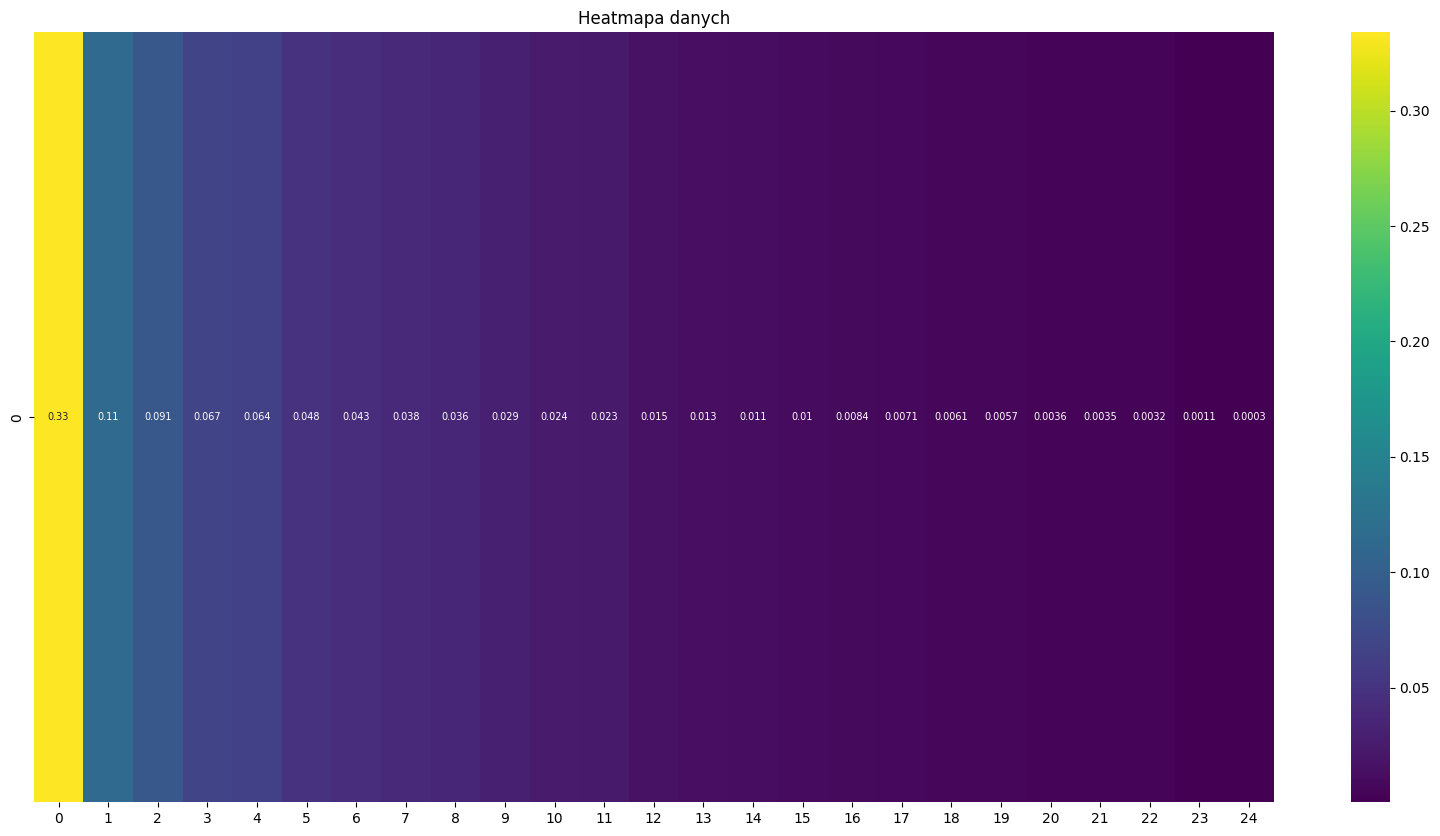

In [9]:
df = pd.DataFrame(explained_variance)
df = df.T

# Tworzenie heatmapy
plt.figure(figsize=(20, 10))
sns.heatmap(df, annot=True, cmap="viridis", annot_kws={"size": 7})
plt.title("Heatmapa danych")
plt.show()

Ten wykres jest wykreslaniem wartości udziału wariancji wyjaśnionej przez poszczególne składowe główne w Analizie Składowych Głównych (PCA). Oto, co prezentuje:

- Na osi poziomej znajdują się numeracje składowych głównych.
- Na osi pionowej znajduje się wartość udziału wariancji wyjaśnionej przez każdą składową główną.
- Każdy słupek na wykresie reprezentuje procentową wartość udziału wariancji wyjaśnionej przez daną składową główną.
- Kolor słupków to niebieski.
- Wykres ten pomaga zobaczyć, jak dużo wariancji jest wyjaśnione przez poszczególne składowe główne. Jest to kluczowe w zrozumieniu efektywności PCA w redukcji wymiarowości danych.

Najważniejsze informacje, które można odczytać z tego wykresu, to:

- Które składowe główne wyjaśniają większą część wariancji danych (słupki o większej wysokości).
- Czy istnieje "łokieć" na wykresie, co oznacza, że można wybrać odpowiednią liczbę składowych głównych, aby zachować istotną część wariancji.

W praktyce analiza takiego wykresu może pomóc w podjęciu decyzji dotyczących liczby składowych głównych do uwzględnienia w analizie, biorąc pod uwagę, ile wariancji można wyjaśnić za pomocą określonej liczby składowych.

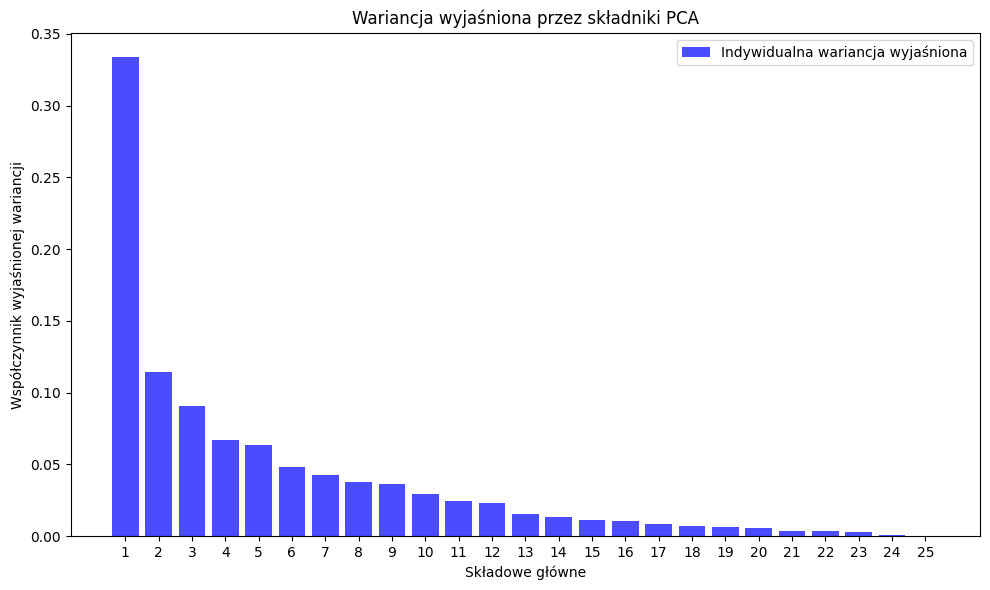

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue', label='Indywidualna wariancja wyjaśniona')
plt.ylabel('Współczynnik wyjaśnionej wariancji')
plt.xlabel('Składowe główne')
plt.title('Wariancja wyjaśniona przez składniki PCA')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend(loc='best')
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

## Klasteryzacja K-średnich

Popularna metoda analizy skupień (ang. cluster analysis) wykorzystywana w uczeniu maszynowym i statystyce do grupowania danych na podstawie ich cech. Metoda ta dzieli zbiór danych na K grup (klastrów), próbując zminimalizować wewnątrzgrupową wariancję.
Klasteryzacja k-średnich jest stosowana w celu grupowania podobnych obserwacji razem, co może pomóc w analizie danych, redukcji wymiarów, czy też ułatwieniu procesu uczenia maszynowego poprzez separację danych na bardziej jednorodne grupy.

Przygotowujemy dane

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
data = pd.read_csv('diamonds.csv', sep=',', header=0)
data = data.sample(frac=0.1)
numerical_features = data[['carat', 'depth', 'table', 'x', 'y', 'z']]

W zbiorze danych znajduje się 5394 diamentów z 10 cechami (karat, szlif, kolor, czystość, głębia, tafla, cena, x, y i z). Większość zmiennych ma charakter numeryczny, ale zmienne cut, color i clarity są zmiennymi jakościowymi.
Zaczynamy od przeskalowania naszych danych.

In [12]:
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)
X = numerical_features_scaled

Kiedy zmniejsza się inercję, oznacza to, że klastry są bardziej skoncentrowane, co zazwyczaj jest pożądane. Jednak inercja sama w sobie nie dostarcza pełnej informacji o jakości klastrów, dlatego zazwyczaj stosuje się ją w kontekście analizy łokcia (elbow method).

Analiza łokcia pomaga w wyborze optymalnej liczby klastrów. W miarę zwiększania liczby klastrów, inercja maleje, ale po pewnym punkcie zyski są coraz mniejsze (klastry są bardziej skoncentrowane, ale również bardziej specyficzne dla pojedynczych punktów danych). Miejsce, gdzie maleje tempo zmiany inercji, jest nazywane "łokciem", a liczba klastrów zwykle wybierana jest na podstawie tego punktu.

In [13]:
inertias = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


C:\Users\48509\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\48509\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\48509\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

Tworzymy wykres inercji

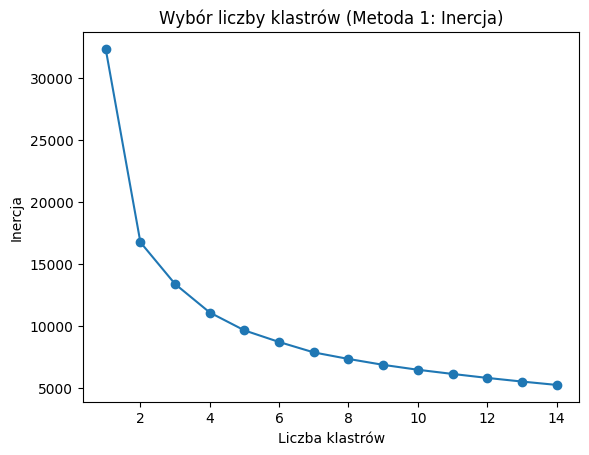

In [14]:
plt.plot(range(1, 15), inertias, marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Inercja')
plt.title('Wybór liczby klastrów (Metoda 1: Inercja)')
plt.show()

Na podstawie wykresu wybieramy optymalną liczbę klastrów - 5. Tworzymy model klasteryzacji KMeans z optymalną liczbą klastrów i dopasowujemy model do danych.

In [15]:
optimal_clusters_inertia = 5
kmeans_inertia = KMeans(n_clusters=optimal_clusters_inertia, random_state=42)
kmeans_inertia.fit(X)

C:\Users\48509\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

Dodajemy etykiety klastrów do danych

In [16]:
data['cluster_inertia'] = kmeans_inertia.labels_

Metoda 2: Silhouette Score 
Silhouette Score to miara, która ocenia, jak dobrze punkty danych są przyporządkowane do klastrów. Miara ta bazuje na dwóch podstawowych elementach: a i b.

a - Średnia odległość między punktem a innymi punktami w tym samym klastrze: To jest średnia odległość punktu od innych punktów w tym samym klastrze. Im mniejsza ta wartość, tym lepiej, ponieważ oznacza to, że punkty w klastrze są blisko siebie.

b - Średnia odległość między punktem a punktami w najbliższym klastrze, do którego punkt nie należy: To jest średnia odległość punktu od punktów w najbliższym klastrze, do którego punkt nie należy. Im większa ta wartość, tym lepiej, ponieważ oznacza to, że punkty są dobrze odseparowane od innych klastrów.

Interpretacja Silhouette Score:
- Silhouette Score mieszczący się w zakresie od -1 do 1.
- Wartości bliskie 1 wskazują na dobrze sklastrowane dane.
- Wartości bliskie -1 oznaczają, że punkty mogą być źle przyporządkowane.
- Wartości bliskie 0 sugerują, że punkt jest na granicy między dwoma klastrami.

In [17]:
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

C:\Users\48509\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\48509\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\48509\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\48509\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

Wykres Silhouette Score

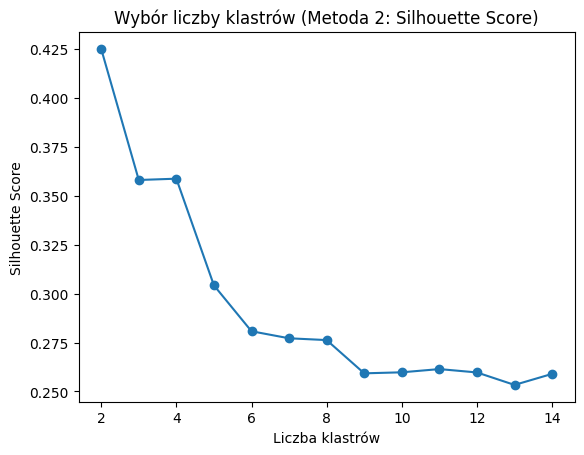

In [18]:
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette Score')
plt.title('Wybór liczby klastrów (Metoda 2: Silhouette Score)')
plt.show()

Wybieramy optymalną liczbę klastrów na podstawie analizy wykresu Silhouette Score

In [19]:
optimal_clusters_silhouette = 4

Tworzymy model klasteryzacji KMeans z wybraną liczbą klastrów

In [20]:
kmeans_silhouette = KMeans(n_clusters=optimal_clusters_silhouette, random_state=42)
kmeans_silhouette.fit(X)
data['cluster_silhouette'] = kmeans_silhouette.labels_

C:\Users\48509\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Wyświetlamy wyniki

In [21]:
print("Wyniki dla optymalnej liczby klastrów (Metoda 1: Inercja):")
print(data[['carat', 'depth', 'table', 'x', 'y', 'z', 'cluster_inertia']])

print("\nWyniki dla optymalnej liczby klastrów (Metoda 2: Silhouette Score):")
print(data[['carat', 'depth', 'table', 'x', 'y', 'z', 'cluster_silhouette']])

Wyniki dla optymalnej liczby klastrów (Metoda 1: Inercja):
       carat  depth  table     x     y     z  cluster_inertia
33278   0.25   64.6   56.0  3.97  3.99  2.57                1
24694   0.30   60.4   60.0  4.30  4.34  2.61                4
33257   0.28   62.0   53.0  4.23  4.29  2.64                1
21787   1.10   61.0   56.0  6.69  6.73  4.09                3
15414   1.05   63.7   59.0  6.42  6.38  4.08                3
...      ...    ...    ...   ...   ...   ...              ...
39298   0.30   62.0   58.0  4.28  4.30  2.66                1
53602   0.70   61.0   56.0  5.75  5.72  3.50                3
46439   0.54   60.9   57.0  5.21  5.26  3.19                1
15637   1.01   61.6   57.0  6.44  6.41  3.96                3
17652   1.10   61.5   57.0  6.65  6.62  4.08                3

[5394 rows x 7 columns]

Wyniki dla optymalnej liczby klastrów (Metoda 2: Silhouette Score):
       carat  depth  table     x     y     z  cluster_silhouette
33278   0.25   64.6   56.0  3.97  3.99

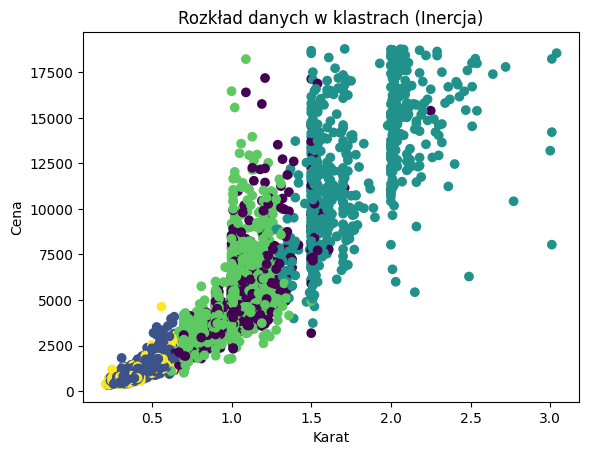

In [22]:
plt.scatter(data['carat'], data['price'], c=data['cluster_inertia'], cmap='viridis')
plt.xlabel('Karat')
plt.ylabel('Cena')
plt.title('Rozkład danych w klastrach (Inercja)')
plt.show()

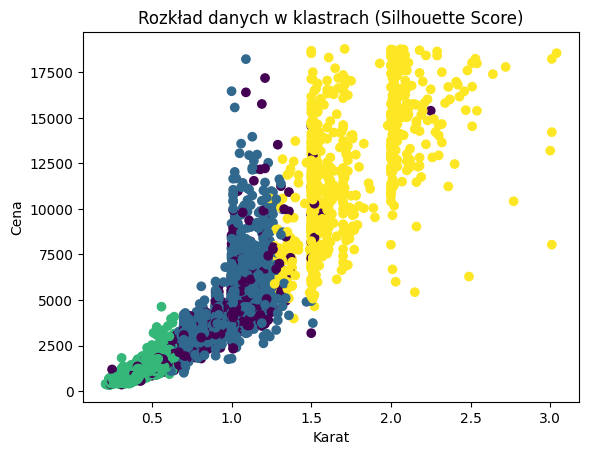

In [23]:
plt.scatter(data['carat'], data['price'], c=data['cluster_silhouette'], cmap='viridis')
plt.xlabel('Karat')
plt.ylabel('Cena')
plt.title('Rozkład danych w klastrach (Silhouette Score)')
plt.show()


## Reguły asocjacyjne

### Apriori

Algorytm wykorzystywany do wykrywania związków między elementami w zbiorze danych. Działa na zasadzie "kombinacji przed selekcją"- generuje kandydatów do związków, a następnie sprawdza ich częstotliwość występowania w danych. Algorytm przeszukuje zbiór danych, tworząc kombinacje elementów i sprawdzając, które z nich występują często jednocześnie. Te, które spełniają określone kryterium częstotliwości, są uznawane za istotne związki i zwracane jako wynik działania algorytmu.

*Czyli np. jak ktoś kupił 2 filmy to może ktoś inny kupił również 2 te same filmy*

Algorytm Apriori stosuje dwa główne kryteria do określania istotności związków między elementami w zbiorze danych: **wsparcie (support)** i **ufność (confidence)**. Te metryki pozwalają zidentyfikować i ocenić siłę związków asocjacyjnych między różnymi przedmiotami w zbiorze danych. Oto szczegółowe opisy tych kryteriów:

**Wsparcie (Support):**
- Wsparcie jest miarą popularności zestawu przedmiotów i jest definiowane jako proporcja transakcji w danych, które zawierają ten zestaw przedmiotów.
- Wskaźnik wsparcia jest podstawą algorytmu Apriori, który polega na idei, że im częściej występuje kombinacja przedmiotów, tym bardziej jest istotna.
- Jest to procentowy udział wszystkich transakcji, które zawierają dany zestaw przedmiotów, w stosunku do całkowitej liczby transakcji.
- Na przykład, jeśli zestaw przedmiotów {chleb, mleko} pojawia się w 100 z 1000 transakcji, wsparcie dla tego zestawu wynosi 10%.

**Ufność (Confidence):**
- Ufność jest miarą niezawodności wygenerowanej reguły asocjacyjnej.
- Definiuje się ją jako stosunek liczby transakcji zawierających wszystkie przedmioty z reguły, do liczby transakcji zawierających tylko przedmioty z lewej strony reguły.
- Innymi słowy, mierzy ona, jak często przedmioty po prawej stronie reguły występują w transakcjach, które zawierają przedmioty po lewej stronie.
- Na przykład, jeśli mamy regułę {chleb} -> {mleko} z ufnością 70%, oznacza to, że 70% transakcji z chlebem zawiera również mleko.

**Lift:**

Lift to miara używana w analizie reguł asocjacyjnych, takich jak te generowane przez algorytm Apriori. Pomaga określić, jak bardzo reguła asocjacyjna jest "interesująca" lub "informatywna" w kontekście analizy danych. W skrócie, lift informuje nas o tym, czy wystąpienie jednego elementu jest związane z wystąpieniem drugiego elementu w danej regule asocjacyjnej i w jakim stopniu.

Oto kilka kluczowych pojęć związanych z miarą lift:

- Lift > 1: Oznacza, że wystąpienie jednego elementu (lub zestawu elementów) zwiększa prawdopodobieństwo wystąpienia drugiego elementu. Im wyższy jest lift, tym silniejszy jest związek między tymi elementami.

- Lift = 1: Oznacza, że wystąpienie jednego elementu nie ma wpływu na prawdopodobieństwo wystąpienia drugiego elementu. Reguła asocjacyjna jest neutralna.

- Lift < 1: Oznacza, że wystąpienie jednego elementu zmniejsza prawdopodobieństwo wystąpienia drugiego elementu. W takim przypadku elementy są negatywnie skorelowane.

Interpretacja: Im większy lift, tym silniejszy związek między elementami. Na przykład, jeśli lift = 2, to oznacza, że wystąpienie jednego elementu jest dwukrotnie bardziej prawdopodobne, jeśli wystąpił drugi element w tej samej transakcji, w porównaniu do wystąpienia tego pierwszego elementu w ogóle transakcji.

**Przydatność:** Lift jest przydatny do wyboru najważniejszych reguł asocjacyjnych. Im wyższy lift, tym bardziej wartościowa jest reguła, ponieważ sugeruje, że występowanie jednego elementu ma wpływ na wystąpienie innego elementu.

In [24]:
with open("proj1.csv", "r") as f:
    csv_reader = csv.reader(f)
    transactions = list(csv_reader)

rules = apriori(transactions, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)

lgorytm ten przeszukuje zbiór danych w celu znalezienia częstych zestawów elementów, które spełniają te kryteria. Funkcja "prepare_output" jest używana do przetwarzania wyników algorytmu Apriori i tworzenia czytelnej tabeli wynikowej. Wyniki zawierają informacje o zestawach elementów (Items), wsparciu (Support), ufności (Confidence) i lift (Lift).\
Wyniki są sortowane w kolejności malejącej na podstawie wartości "Lift", co oznacza, że zestawy elementów są uporządkowane od tych, które mają największy wpływ na siebie nawzajem.

In [25]:
def prepare_output(results):
    Support, Confidence, Lift, Items, Antecedent, Consequent = [], [], [], [], [], []

    for RelationRecord in results:
        for ordered_stat in RelationRecord.ordered_statistics:
            Support.append(RelationRecord.support)
            Items.append(set(RelationRecord.items))
            Antecedent.append(set(ordered_stat.items_base))
            Consequent.append(set(ordered_stat.items_add))
            Confidence.append(ordered_stat.confidence)
            Lift.append(ordered_stat.lift)

    df = pd.DataFrame({
        'Items': Items,
        'Antecedent': Antecedent,
        'Consequent': Consequent,
        'Support': Support,
        'Confidence': Confidence,
        'Lift': Lift
    })

    return df

Wyniki te pozwalają zrozumieć, które zestawy elementów są często występujące i mają silne związki wzajemne w analizowanych danych. Dla każdego zestawu elementów można ocenić, jakie są wsparcie, ufność i lift, co pomaga w identyfikacji istotnych związków między elementami w danych.

In [26]:
results = prepare_output(rules)

sorted_results = results.sort_values("Lift", ascending=False)

print(sorted_results)

                                                 Items  \
548  {MANHATTAN, STREET, COMPLETED, SEXUAL ABUSE, F...   
920  {MANHATTAN, STREET, SEX CRIMES, COMPLETED, SEX...   
925  {MANHATTAN, STREET, SEX CRIMES, COMPLETED, SEX...   
550  {MANHATTAN, STREET, COMPLETED, SEXUAL ABUSE, F...   
922  {MANHATTAN, STREET, SEX CRIMES, COMPLETED, SEX...   
..                                                 ...   
500  {RESIDENCE-HOUSE, BROOKLYN, SEX CRIMES, SEXUAL...   
497  {RESIDENCE-HOUSE, BROOKLYN, SEX CRIMES, SEXUAL...   
676  {RESIDENCE-HOUSE, MISDEMEANOR, SEX CRIMES, STA...   
679  {RESIDENCE-HOUSE, MISDEMEANOR, SEX CRIMES, STA...   
239  {RESIDENCE-HOUSE, MISDEMEANOR, STATEN ISLAND, ...   

                                          Antecedent  \
548                                 {STREET, FELONY}   
920                                 {STREET, FELONY}   
925                     {STREET, SEX CRIMES, FELONY}   
550                      {STREET, FELONY, COMPLETED}   
922                    